Original Data Shape: (150, 4)

Explained Variance Ratio:
Principal Component 1: 0.8414
Principal Component 2: 0.1175
Cumulative Explained Variance: [0.84136038 0.95887846]


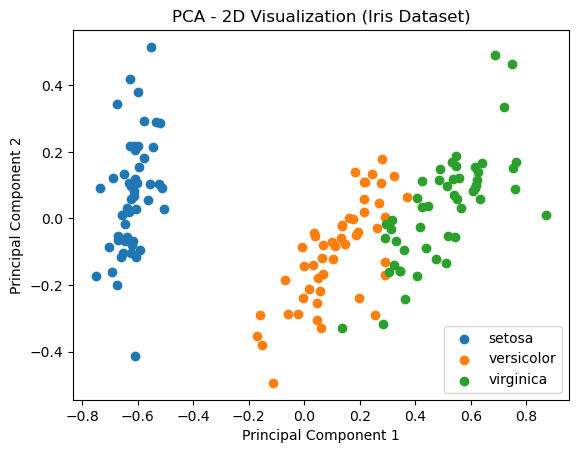

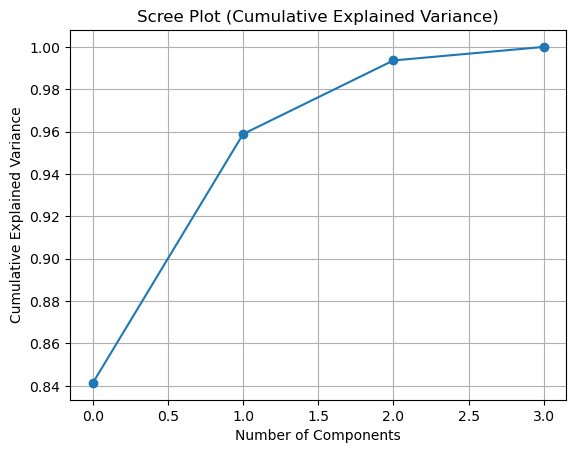

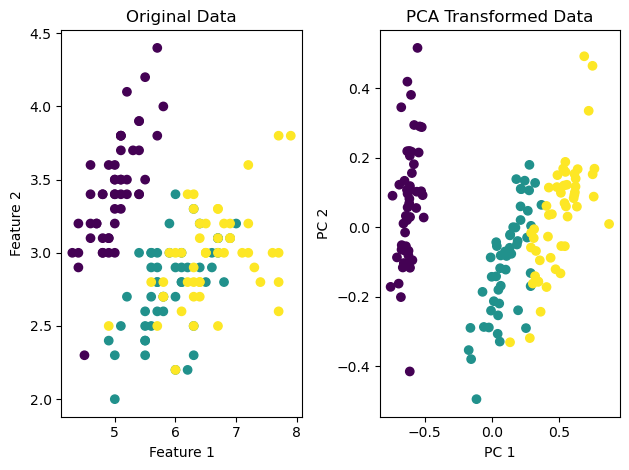

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris  
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
data = load_iris()
X = data.data
y = data.target
target_names = data.target_names
print("Original Data Shape:", X.shape)
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)
normalizer = MinMaxScaler()
X_normalized = normalizer.fit_transform(X_standardized)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_normalized)
print("\nExplained Variance Ratio:")
for i, var in enumerate(pca.explained_variance_ratio_):
    print(f"Principal Component {i+1}: {var:.4f}")
print("Cumulative Explained Variance:",
      np.cumsum(pca.explained_variance_ratio_))
plt.figure()
for i in np.unique(y):
    plt.scatter(X_pca[y == i, 0],
                X_pca[y == i, 1],
                label=target_names[i])
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA - 2D Visualization (Iris Dataset)")
plt.legend()
plt.show()
pca_full = PCA()
X_pca_full = pca_full.fit_transform(X_normalized)
plt.figure()
plt.plot(np.cumsum(pca_full.explained_variance_ratio_), marker='o')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Scree Plot (Cumulative Explained Variance)")
plt.grid(True)
plt.show()
plt.figure()
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Original Data")
plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.title("PCA Transformed Data")
plt.tight_layout()
plt.show()
